# Dataset Prep

In [1]:
!pip install seaborn
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
print(plt.style.available)
plt.style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv("social_media/train.csv")
df.drop('User_ID', axis=1, inplace=True)
#1001 rows, 9 columns
print("Shape of df: ", df.shape)
#gets first 20 values

test_df = pd.read_csv("social_media/test.csv")
test_df.drop('User_ID', axis=1, inplace=True)
print("Shape of test_df: ", test_df.shape)

df.tail(10)

Shape of df:  (1001, 9)
Shape of test_df:  (103, 9)


,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
991,27,Non-binary,Facebook,50.0,1.0,10.0,4.0,10.0,Boredom
992,32,Female,Whatsapp,105.0,4.0,55.0,25.0,25.0,Anger
993,24,Male,Telegram,75.0,3.0,37.0,16.0,22.0,Neutral
994,29,Female,Snapchat,95.0,2.0,23.0,10.0,28.0,Sadness
995,26,Male,Instagram,150.0,5.0,70.0,25.0,30.0,Anxiety
996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger
1000,27,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral


In [4]:
#counts different values in columns
df['Gender'].value_counts()

Gender
Female        344
Male          332
Non-binary    248
29             10
27              8
28              8
31              8
22              6
25              6
24              6
33              4
34              4
26              4
21              4
30              2
23              2
35              2
32              2
Name: count, dtype: int64

In [5]:
missing_val = df.isnull().sum()
missing_val

Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [6]:
df = df.dropna()
(df).isnull().sum()

Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [7]:
df['Age'].value_counts()
#strings = df[ (df['Age'] == "Male") | (df['Age'] == "Female") | df['Age'] == "Non-binary"].index
df.drop(df[(df['Age'] == "Male")].index , inplace=True)
df.drop(df[(df['Age'] == "Female")].index , inplace=True)
df.drop(df[(df['Age'] == "Non-binary")].index , inplace=True)
df.shape
df['Age'].value_counts()


#Same for test data
test_df.drop(test_df[(test_df['Age'] == "Male")].index , inplace=True)

In [8]:
test_df

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,27,Female,Snapchat,120,4,40,18,22,Neutral
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,27,Male,Telegram,105,3,48,20,28,Anxiety
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral
...,...,...,...,...,...,...,...,...,...
98,22,Male,Twitter,70,1,20,5,22,Neutral
99,33,Male,LinkedIn,85,4,35,18,18,Boredom
100,24,Non-binary,Facebook,110,6,35,23,25,Sadness
101,24,Male,Telegram,75,3,37,16,22,Neutral


# Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
df_copy = df.copy()

In [11]:
scaler = StandardScaler()
num_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
#scaling data for better predictions to local minima, etc.
df_copy[num_cols] = scaler.fit_transform((df[num_cols]))
df_copy

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,-0.634624,Female,Instagram,0.604240,-0.180279,0.177461,-0.641320,-1.227776,Happiness
1,0.634624,Male,Twitter,-0.160928,0.851164,-0.755908,1.038645,0.858063,Anger
2,-1.396173,Non-binary,Facebook,-0.926097,-0.696001,-0.942581,-1.201309,-0.300736,Neutral
3,0.126925,Female,Instagram,2.644690,2.398329,2.230873,1.598634,3.175662,Anxiety
4,1.396173,Male,LinkedIn,-1.308681,-1.211723,-1.315929,-1.537302,-1.459535,Boredom
...,...,...,...,...,...,...,...,...,...
996,1.396173,Non-binary,Twitter,-0.288456,0.335442,-0.195886,0.254661,-0.532496,Boredom
997,-1.396173,Female,Facebook,-0.671041,-1.211723,-0.979916,-1.089311,-1.459535,Neutral
998,1.903872,Male,Whatsapp,0.349184,-0.180279,0.364135,1.038645,0.278664,Happiness
999,0.126925,Non-binary,Telegram,-0.926097,-0.696001,-0.830577,-0.865316,-0.532496,Anger


In [12]:
#scaling test data as well
test_df_copy = test_df.copy()
test_df_copy
test_df_copy[num_cols] = scaler.fit_transform((test_df[num_cols]))

In [13]:
test_df_copy

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,-0.102791,Female,Snapchat,0.989149,0.684666,0.313943,0.552830,0.229933,Neutral
1,-1.758273,Non-binary,Snapchat,-0.823304,-1.075904,-0.665874,-0.831713,-1.133625,Neutral
2,0.173122,Non-binary,Snapchat,0.838111,0.097809,0.224869,0.552830,0.911713,Anxiety
3,-0.102791,Male,Telegram,0.536036,0.097809,0.670240,0.804566,1.048068,Anxiety
4,-1.758273,Non-binary,Facebook,-0.974341,0.097809,-0.710411,-0.831713,-1.133625,Neutral
...,...,...,...,...,...,...,...,...,...
98,-1.482359,Male,Twitter,-0.521228,-1.075904,-0.576800,-1.083449,0.229933,Neutral
99,1.552690,Male,LinkedIn,-0.068115,0.684666,0.091257,0.552830,-0.315490,Boredom
100,-0.930532,Non-binary,Facebook,0.687073,1.858379,0.091257,1.182168,0.639001,Sadness
101,-0.930532,Male,Telegram,-0.370190,0.097809,0.180332,0.301095,0.229933,Neutral


# Categorical Data -> Numerical

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
#defining categorical columns
cat_columns = ['Gender', 'Platform']

#initialize encoder
encoder = OneHotEncoder(sparse_output=False)

#encode data
df_encoded = pd.DataFrame(encoder.fit_transform(df_copy[cat_columns]))
df_encoded.columns = encoder.get_feature_names_out(cat_columns)

In [16]:
print("Encoded shape: ", df_encoded.shape)
print("Copy shape: ", df_copy.shape)

#ensuring shape is the same
df_copy.reset_index(level=None, drop=False, col_level=0, col_fill='', inplace=True)
df_copy.drop(["index"], axis=1, inplace=True)
df_copy

Encoded shape:  (924, 10)
Copy shape:  (924, 9)


,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,-0.634624,Female,Instagram,0.604240,-0.180279,0.177461,-0.641320,-1.227776,Happiness
1,0.634624,Male,Twitter,-0.160928,0.851164,-0.755908,1.038645,0.858063,Anger
2,-1.396173,Non-binary,Facebook,-0.926097,-0.696001,-0.942581,-1.201309,-0.300736,Neutral
3,0.126925,Female,Instagram,2.644690,2.398329,2.230873,1.598634,3.175662,Anxiety
4,1.396173,Male,LinkedIn,-1.308681,-1.211723,-1.315929,-1.537302,-1.459535,Boredom
...,...,...,...,...,...,...,...,...,...
919,1.396173,Non-binary,Twitter,-0.288456,0.335442,-0.195886,0.254661,-0.532496,Boredom
920,-1.396173,Female,Facebook,-0.671041,-1.211723,-0.979916,-1.089311,-1.459535,Neutral
921,1.903872,Male,Whatsapp,0.349184,-0.180279,0.364135,1.038645,0.278664,Happiness
922,0.126925,Non-binary,Telegram,-0.926097,-0.696001,-0.830577,-0.865316,-0.532496,Anger


In [17]:
#concatenate encoded data to df
df_copy = df_copy.drop(cat_columns,axis=1)
df_copy = pd.concat([df_encoded, df_copy], axis=1)

In [18]:
df_copy['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

In [19]:
def condition(x):
    if x == "Happiness":
        return 0
    elif x == "Anger":
        return 1
    elif x == "Neutral":
        return 2
    elif x == "Anxiety":
        return 3
    elif x == "Boredom":
        return 4
    else:
        return 5

In [20]:
df_copy['Dominant_Emotion'] = df_copy['Dominant_Emotion'].apply(condition)

In [21]:
print("Shape of df: ", df_copy.shape)
df_copy.head()

Shape of df:  (924, 17)


,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.634624,0.604240,-0.180279,0.177461,-0.641320,-1.227776,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.634624,-0.160928,0.851164,-0.755908,1.038645,0.858063,1
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.396173,-0.926097,-0.696001,-0.942581,-1.201309,-0.300736,2
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.126925,2.644690,2.398329,2.230873,1.598634,3.175662,3
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.396173,-1.308681,-1.211723,-1.315929,-1.537302,-1.459535,4


In [22]:
#encoding test data as well
df_test_encoded = pd.DataFrame(encoder.fit_transform(test_df_copy[cat_columns]))
df_test_encoded.columns = encoder.get_feature_names_out(cat_columns)

test_df_copy = test_df_copy.drop(cat_columns,axis=1)
test_df_copy = pd.concat([df_test_encoded, test_df_copy], axis=1)

test_df_copy['Dominant_Emotion'] = test_df_copy['Dominant_Emotion'].apply(condition)

In [23]:
test_df_copy

,Gender_Female,Gender_Male,Gender_Marie,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.102791,0.989149,0.684666,0.313943,0.552830,0.229933,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.758273,-0.823304,-1.075904,-0.665874,-0.831713,-1.133625,2
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.173122,0.838111,0.097809,0.224869,0.552830,0.911713,3
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.102791,0.536036,0.097809,0.670240,0.804566,1.048068,3
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.758273,-0.974341,0.097809,-0.710411,-0.831713,-1.133625,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.482359,-0.521228,-1.075904,-0.576800,-1.083449,0.229933,2
99,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.552690,-0.068115,0.684666,0.091257,0.552830,-0.315490,4
100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.930532,0.687073,1.858379,0.091257,1.182168,0.639001,5
101,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.930532,-0.370190,0.097809,0.180332,0.301095,0.229933,2


# Model

In [24]:
X_train = df_copy.drop(["Dominant_Emotion"], axis=1)
y_train = df_copy['Dominant_Emotion']
X_test = test_df_copy.drop(["Dominant_Emotion"], axis=1)
y_test = test_df_copy['Dominant_Emotion']

In [25]:
#!pip install -U keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.optimizers import Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(6, activation='softmax'),
])

2024-07-10 13:59:23.931893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#opt = Adam(lr=0.1)
model.compile(loss=loss_function,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.8),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
             )

In [27]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2082 - loss: 6839569.0000
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8897 
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8233 
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8425 
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8430 
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8459 
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8474 
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8486 
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8494 
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8501 
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8506 
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 69/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 70/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 71/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 72/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 73/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 74/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 75/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 76/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 77/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 78/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 1.8536 
Epoch 79/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

# Plotting to make model better

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [29]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

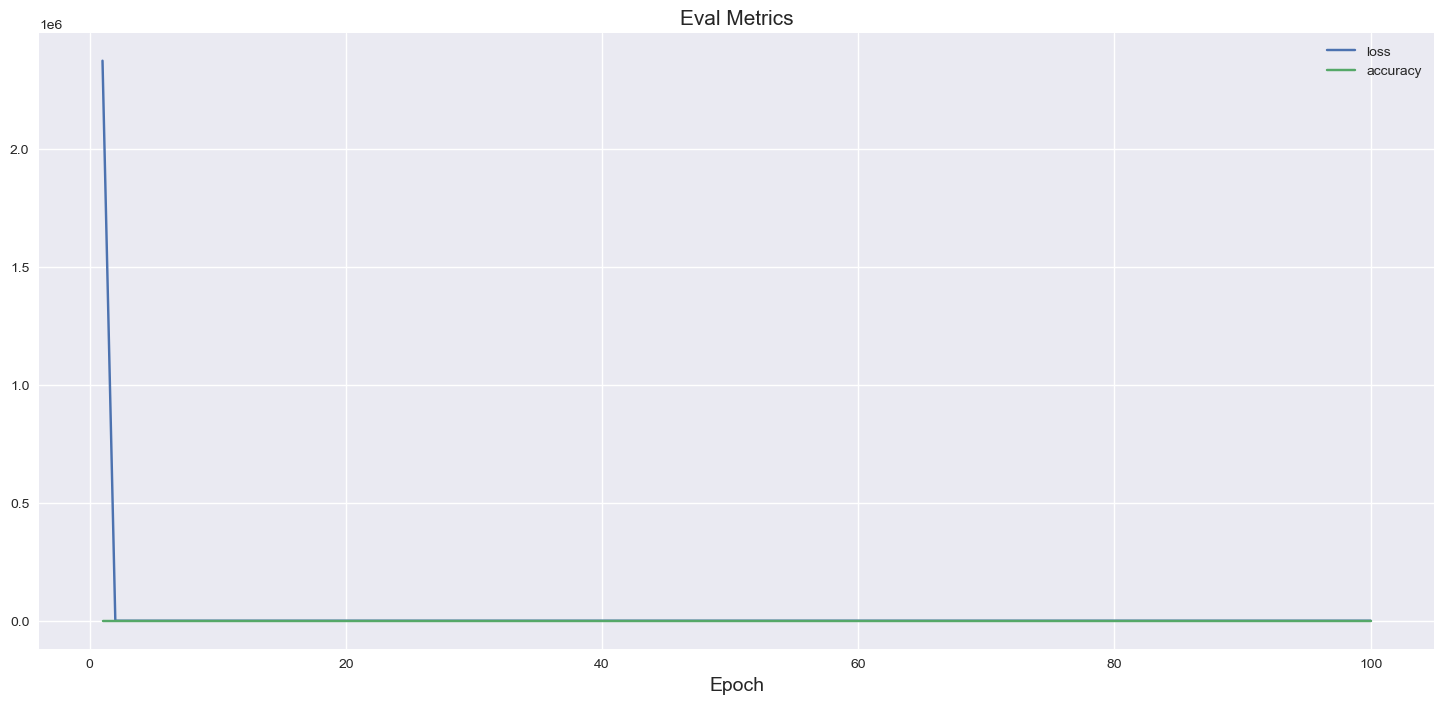

In [30]:
plt.plot(np.arange(1,101), history.history['loss'], label='loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='accuracy')
plt.title("Eval Metrics", size=15)
plt.xlabel('Epoch', size=14)
plt.legend()
plt.show()

### Conclusion: More data is needed, learning rate does adjust loss somewhat, but the highest prediction model can make is 20% due to low data amounts

# Using Decision Tree

In [70]:
from sklearn import tree
from sklearn import metrics

In [75]:
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
X_test.drop(['Gender_Marie'], axis=1, inplace=True)

KeyError: "['Gender_Marie'] not found in axis"

In [76]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
y_pred = dtc.predict(X_test)

In [77]:
counter = 0
for i in y_pred:
    if y_pred[i] == y_test[i]:
        counter += 1
counter = counter / len(y_pred)

In [78]:
counter

0.6504854368932039

In [79]:
# 65% accuracy is better than 20 so a Decision Tree Classification Model Seems to work better!

#Next step is to try to build on it to increase accuracy